Data Source: 

- https://www.kaggle.com/datasets/nikhilkohli/us-stock-market-data-60-extracted-features

In [1]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import  train_test_split
from sklearn import metrics

In [2]:
df_stock = pd.read_csv('data/us-stock/AAPL.csv',  index_col=0)
df_stock = df_stock.rename(columns={'Close(t)':'Close'})
df_stock.head()

,Open,High,Low,Close,Volume,SD20,Upper_Band,Lower_Band,S_Close(t-1),S_Close(t-2),...,QQQ_MA10,QQQ_MA20,QQQ_MA50,SnP_Close,SnP(t-1)),SnP(t-5),DJIA_Close,DJIA(t-1)),DJIA(t-5),Close_forcast
Date,,,,,,,,,,,,,,,,,,,,,
2005-10-17,6.66,6.69,6.50,6.60,154208600,0.169237,6.827473,6.150527,6.67,6.63,...,33.692,33.9970,34.2690,1190.10,1186.57,1187.33,10348.10,10287.34,10238.76,6.45
2005-10-18,6.57,6.66,6.44,6.45,152397000,0.168339,6.819677,6.146323,6.60,6.67,...,33.570,33.9525,34.2466,1178.14,1190.10,1184.87,10285.26,10348.10,10253.17,6.78
2005-10-19,6.43,6.78,6.32,6.78,252170800,0.180306,6.861112,6.139888,6.45,6.60,...,33.562,33.9600,34.2330,1195.76,1178.14,1177.68,10414.13,10285.26,10216.91,6.93
2005-10-20,6.72,6.97,6.71,6.93,339440500,0.202674,6.931847,6.121153,6.78,6.45,...,33.567,33.9455,34.2190,1177.80,1195.76,1176.84,10281.10,10414.13,10216.59,6.87
2005-10-21,7.02,7.03,6.83,6.87,199181500,0.216680,6.974860,6.108140,6.93,6.78,...,33.586,33.9365,34.2034,1179.59,1177.80,1186.57,10215.22,10281.10,10287.34,7.01


In [3]:
df_stock.tail(5)

,Open,High,Low,Close,Volume,SD20,Upper_Band,Lower_Band,S_Close(t-1),S_Close(t-2),...,QQQ_MA10,QQQ_MA20,QQQ_MA50,SnP_Close,SnP(t-1)),SnP(t-5),DJIA_Close,DJIA(t-1)),DJIA(t-5),Close_forcast
Date,,,,,,,,,,,,,,,,,,,,,
2020-08-07,452.82,454.70,441.17,444.45,49453300,27.954399,455.316298,343.498702,454.79,439.46,...,266.054,263.4085,252.2098,3351.28,3349.16,3271.12,27433.48,27386.98,26428.32,450.91
2020-08-10,450.40,455.10,440.00,450.91,53100900,29.847338,462.586675,343.197325,444.45,454.79,...,267.073,263.9970,252.9570,3360.47,3351.28,3294.61,27791.44,27433.48,26664.40,437.50
2020-08-11,447.88,449.93,436.43,437.50,46975600,30.576290,466.543079,344.237921,450.91,444.45,...,267.911,264.2380,253.5878,3333.69,3360.47,3306.51,27686.91,27791.44,26828.47,452.04
2020-08-12,441.99,453.10,441.19,452.04,41486200,32.050532,472.583564,344.381436,437.50,450.91,...,269.120,264.7860,254.3206,3380.35,3333.69,3327.77,27976.84,27686.91,27201.52,460.04
2020-08-13,457.72,464.17,455.71,460.04,52520500,33.532634,479.279768,345.149232,452.04,437.50,...,270.255,265.4540,255.0446,3373.43,3380.35,3349.16,27896.72,27976.84,27386.98,459.63


In [4]:
df_stock.shape

(3732, 63)

In [5]:
df_stock.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'SD20', 'Upper_Band',
       'Lower_Band', 'S_Close(t-1)', 'S_Close(t-2)', 'S_Close(t-3)',
       'S_Close(t-5)', 'S_Open(t-1)', 'MA5', 'MA10', 'MA20', 'MA50', 'MA200',
       'EMA10', 'EMA20', 'EMA50', 'EMA100', 'EMA200', 'MACD', 'MACD_EMA',
       'ATR', 'ADX', 'CCI', 'ROC', 'RSI', 'William%R', 'SO%K', 'STD5',
       'ForceIndex1', 'ForceIndex20', 'Date_col', 'Day', 'DayofWeek',
       'DayofYear', 'Week', 'Is_month_end', 'Is_month_start', 'Is_quarter_end',
       'Is_quarter_start', 'Is_year_end', 'Is_year_start', 'Is_leap_year',
       'Year', 'Month', 'QQQ_Close', 'QQQ(t-1)', 'QQQ(t-2)', 'QQQ(t-5)',
       'QQQ_MA10', 'QQQ_MA20', 'QQQ_MA50', 'SnP_Close', 'SnP(t-1))',
       'SnP(t-5)', 'DJIA_Close', 'DJIA(t-1))', 'DJIA(t-5)', 'Close_forcast'],
      dtype='object')

### Plot Time Series chart for AAPL

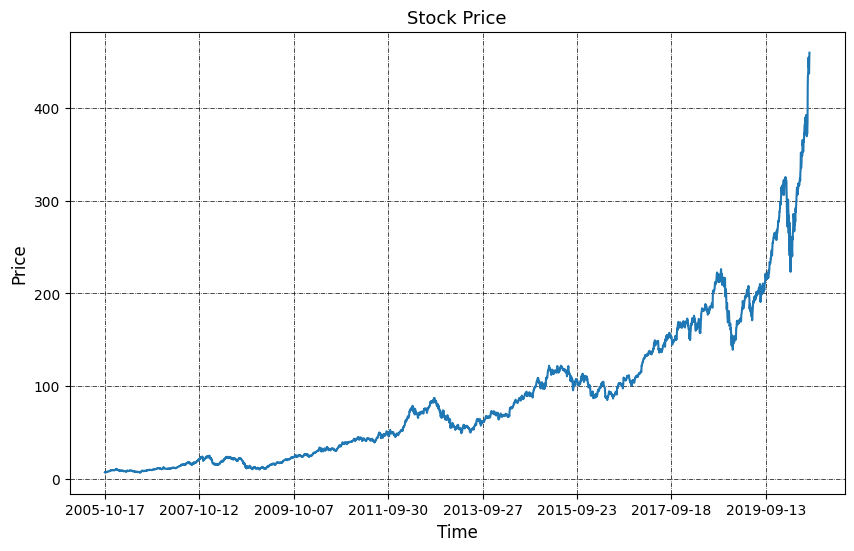

In [6]:
df_stock['Close'].plot(figsize=(10, 6))
plt.title("Stock Price", fontsize=13)
plt.ylabel('Price', fontsize=12)
plt.xlabel('Time', fontsize=12)
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
plt.show()

Remove some of the columns which are not required

In [7]:
df_stock = df_stock.drop(columns='Date_col')

### Test Train Set

Close_forecast is the column that we are trying to predict here which is the price for the next day. 

In [8]:
from sklearn.preprocessing import StandardScaler

X = df_stock.drop(columns=['Close_forcast'], axis=1)
y = df_stock['Close_forcast']

scaler_X = StandardScaler()
X = scaler_X.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42)

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(2799, 61) (933, 61)
(2799,) (933,)


In [9]:
y_test

Date
2017-03-10    132.63
2015-09-21    104.79
2012-06-14     70.88
2012-05-09     70.43
2007-05-03     12.44
               ...  
2008-03-25     17.91
2018-12-20    147.48
2014-08-22     92.26
2020-05-06    302.37
2015-03-13    114.47
Name: Close_forcast, Length: 933, dtype: float64

In [10]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [11]:
print('LR Coefficients: \n', lr.coef_)
print('LR Intercept: \n', lr.intercept_)

LR Coefficients: 
 [ 9.98417573e-01  1.37597502e+01  6.41901127e+00 -2.27042212e+01
  8.79956181e-02  4.27854245e+05 -1.75563710e+06  3.23319089e+06
 -6.43912544e+01 -4.24577097e+01 -1.61687867e+01 -2.84642508e+01
  7.05591071e+00 -4.46566541e+01 -2.01373832e+01 -1.81920161e+06
  3.90296857e-02  1.93563253e+00  5.28449172e+05  5.29874558e+05
  2.85276363e+06 -1.36799007e+06 -2.54281454e+06  3.54990950e+00
 -2.34032737e+00 -2.63939443e-01  8.64434900e-02  1.92025462e+11
 -4.35477122e-02 -5.32013799e-02  7.35064966e+06 -7.35064952e+06
 -1.47211688e-01 -3.73182297e-01  4.92839813e-02 -4.25713062e-01
 -6.04095459e-02  5.01789856e+00 -1.54632568e-01  7.09190369e-02
 -2.47430801e-02 -9.60273743e-02  3.79714966e-02  7.89618492e-02
 -4.87090582e+05 -9.09614563e-02 -4.84237671e-01 -4.88282776e+00
 -3.67049217e+00  7.59627819e+00 -3.75049782e+00  1.10392761e+00
 -5.00070572e+00 -1.32564545e-01  4.94374084e+00  1.35933075e+01
 -1.66610909e+01  4.03753662e+00 -1.49610443e+01  1.69116211e+01
 -4.10

### Predict for the test dataset

In [12]:
y_train_pred = lr.predict(X_train)

In [13]:
y_test_pred = lr.predict(X_test)
y_test_pred

array([132.71284657, 107.09377979,  70.32560073,  69.42541728,
        12.2630674 ,  10.24009523,   7.04209703,  61.70864668,
        61.77906461,  16.86898975,  91.92753183, 182.31089848,
         8.3084246 , 108.52289126,  25.17900125, 117.05339606,
        95.95799511,  12.41179981, 110.22514201,  15.20539901,
        61.06192809, 184.10815986, 214.32341555,  10.43280169,
       316.17664822, 191.14201481, 182.9985697 ,   6.85341953,
        11.23847522,  38.04018299,   8.14859007,  49.23313175,
       146.56138354, 318.12084972,  65.44458561,  48.08116732,
        53.86342754, 201.11919611,  15.79788933, 118.38471086,
        14.93862782,  57.18721915, 151.58753184, 185.25317156,
        67.0121438 , 166.92404405,  17.04468575,  16.89711115,
        12.02607107, 106.331601  ,  91.20904734,  73.60084903,
        11.56820069,  26.05154697,  83.36434649,   8.84287963,
       113.33273879,  90.76886547,  19.62324444,  47.27308591,
       439.71155351, 181.92018367, 112.86692163, 106.37

In [14]:
print("Training MAPE: ", round(metrics.mean_absolute_percentage_error(y_train, y_train_pred), 2), "%")
print(
    "Training Mean Squared Error:",
    round(metrics.mean_squared_error(y_train, y_train_pred), 2),
)
print(
    "Training RMSE: ",
    round(np.sqrt(metrics.mean_squared_error(y_train, y_train_pred)), 2),
)
print("Training MAE: ", round(metrics.mean_absolute_error(y_train, y_train_pred), 2))

Training MAPE:  0.02 %
Training Mean Squared Error: 5.98
Training RMSE:  2.45
Training MAE:  1.24


In [15]:
print("Test R-squared:", metrics.r2_score(
    y_test, y_test_pred))
print("Test MAPE:", metrics.mean_absolute_percentage_error(
    y_test, y_test_pred), "%")
print(
    "Test Mean Squared Error:",
    metrics.mean_squared_error(y_test, y_test_pred)
)
print("Test RMSE: ", np.sqrt(metrics.mean_squared_error(
    y_test, y_test_pred)))
print("Test MAE: ", metrics.mean_absolute_error(
    y_test, y_test_pred))

Test R-squared: 0.9991770518494122
Test MAPE: 0.01773257615144969 %
Test Mean Squared Error: 5.0864456534135645
Test RMSE:  2.2553149787587463
Test MAE:  1.1024841492536244


In [16]:
df_test_pred = pd.DataFrame(y_test.values, 
                columns=['Actual'], index=y_test.index)
df_test_pred['Predicted'] = y_test_pred
df_test_pred = df_test_pred.reset_index()
sorted_df_test_pred = df_test_pred.sort_values(by='Date')
sorted_df_test_pred = sorted_df_test_pred.reset_index()
sorted_df_test_pred = sorted_df_test_pred.drop(columns=['index'])
sorted_df_test_pred

,Date,Actual,Predicted
0,2005-10-17,6.45,6.781477
1,2005-10-26,6.84,7.419708
2,2005-11-02,7.64,7.620224
3,2005-11-04,7.44,7.811739
4,2005-11-09,7.55,7.895550
...,...,...,...
928,2020-07-27,372.34,378.213028
929,2020-07-29,384.07,378.900912
930,2020-08-06,444.45,458.194741
931,2020-08-11,452.04,439.711554


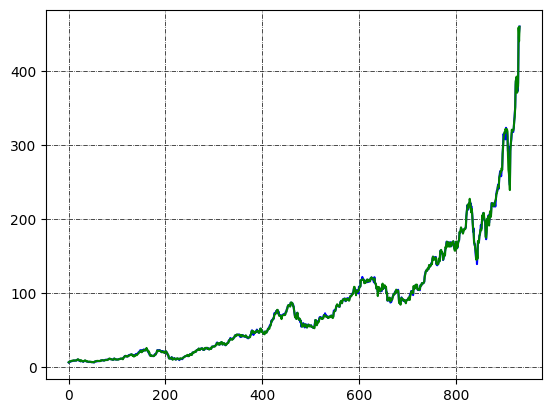

In [17]:
plt.plot(sorted_df_test_pred.index, sorted_df_test_pred['Actual'], color='b')
plt.plot(sorted_df_test_pred.index, sorted_df_test_pred['Predicted'], color='g')
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
plt.show()

In [18]:
df_train_pred = pd.DataFrame(y_train.values, columns=['Actual'], index=y_train.index)
df_train_pred['Predicted'] = y_train_pred
df_train_pred = df_train_pred.reset_index()
sorted_df_train_pred = df_train_pred.sort_values(by='Date')
sorted_df_train_pred = sorted_df_train_pred.reset_index()
sorted_df_train_pred = sorted_df_train_pred.drop(columns=['index'])
sorted_df_train_pred

,Date,Actual,Predicted
0,2005-10-18,6.78,6.471999
1,2005-10-19,6.93,6.946561
2,2005-10-20,6.87,7.384496
3,2005-10-21,7.01,7.314377
4,2005-10-24,6.93,7.345238
...,...,...,...
2794,2020-08-04,439.46,440.634808
2795,2020-08-05,454.79,440.079367
2796,2020-08-07,450.91,443.185779
2797,2020-08-10,437.50,447.533670


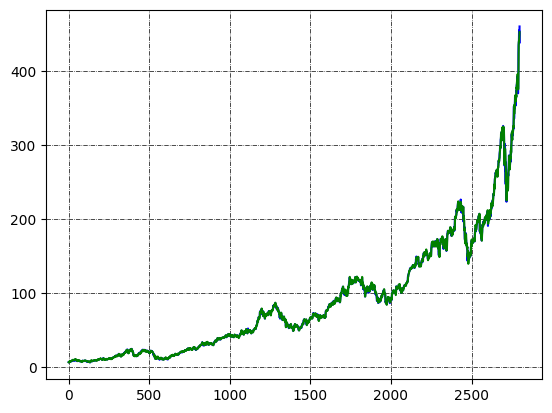

In [19]:
plt.plot(sorted_df_train_pred.index, sorted_df_train_pred['Actual'], color='b')
plt.plot(sorted_df_train_pred.index, sorted_df_train_pred['Predicted'], color='g')
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
plt.show()

In [20]:
df_train_pred = pd.DataFrame(y_train.values, 
                    columns=['Actual'], index=y_train.index)
df_train_pred['Predicted'] = y_train_pred
df_train_pred = df_train_pred.reset_index()
sorted_df_train_pred = df_train_pred.sort_values(by='Date')
sorted_df_train_pred = sorted_df_train_pred.reset_index()
sorted_df_train_pred = sorted_df_train_pred.drop(columns=['index'])
sorted_df_train_pred['AE'] = \
    (sorted_df_train_pred['Predicted'] - \
     sorted_df_train_pred['Actual']).abs()
sorted_df_train_pred['SE'] = \
    np.square((sorted_df_train_pred['Predicted'] - \
     sorted_df_train_pred['Actual']))
sorted_df_train_pred

,Date,Actual,Predicted,AE,SE
0,2005-10-18,6.78,6.471999,0.308001,0.094864
1,2005-10-19,6.93,6.946561,0.016561,0.000274
2,2005-10-20,6.87,7.384496,0.514496,0.264706
3,2005-10-21,7.01,7.314377,0.304377,0.092645
4,2005-10-24,6.93,7.345238,0.415238,0.172423
...,...,...,...,...,...
2794,2020-08-04,439.46,440.634808,1.174808,1.380173
2795,2020-08-05,454.79,440.079367,14.710633,216.402715
2796,2020-08-07,450.91,443.185779,7.724221,59.663590
2797,2020-08-10,437.50,447.533670,10.033670,100.674525


<AxesSubplot:>

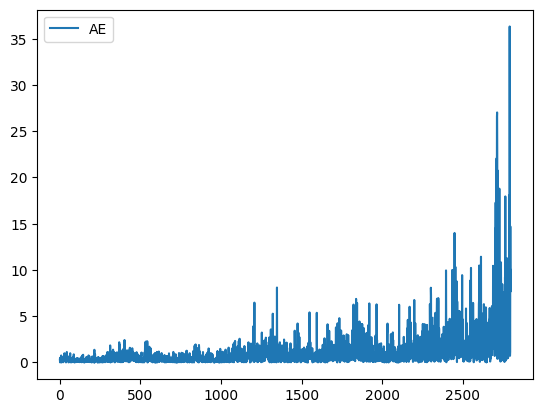

In [21]:
sorted_df_train_pred[['AE']].plot()

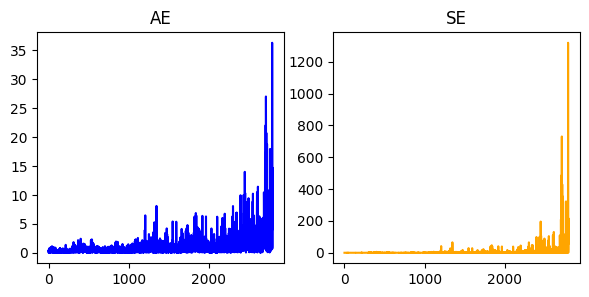

In [22]:
fig, axs = plt.subplots(1, 2, figsize=(7, 3))

axs[0].plot(sorted_df_train_pred['AE'], color='blue')
axs[0].set_title('AE')

axs[1].plot(sorted_df_train_pred['SE'], color='orange')
axs[1].set_title('SE')

plt.show()

In [23]:
mae = sorted_df_train_pred['AE'].mean()
mse = sorted_df_train_pred['SE'].mean()
print('mae = ', mae)
print('mse = ', mse)

mae =  1.2358514394376081
mse =  5.980281121100539


In [24]:
mae2 = metrics.mean_absolute_error(y_train, y_train_pred)
mse2 = metrics.mean_squared_error(y_train, y_train_pred)
print('mae2 = ', mae2)
print('mse2 = ', mse2)

mae2 =  1.2358514394376081
mse2 =  5.980281121100539


In [25]:
from sklearn.linear_model import SGDRegressor

regressor = SGDRegressor(eta0=0.0005)
losses = []
epochs = 100

for epoch in range(epochs):
    regressor.partial_fit(X_train, y_train)
    loss = (regressor.predict(X_train) - y_train).abs().mean()
    losses.append(loss)

In [35]:
losses[:30]

[67.72470363120252,
 56.79656674045813,
 48.7105663970458,
 42.33075082694444,
 37.080159710529756,
 32.706366075711024,
 29.041784255227213,
 25.851417571691172,
 23.094470067080398,
 20.704238469242814,
 18.618771175778054,
 16.791590311977288,
 15.170563678291403,
 13.741087257680855,
 12.473330367265328,
 11.340264233745913,
 10.34260752615806,
 9.445995111536972,
 8.630934455743699,
 7.931425626414553,
 7.278132049319633,
 6.708735237035398,
 6.2092872082687425,
 5.7181291554687474,
 5.354147621607431,
 4.956232812129057,
 4.623725572335515,
 4.370232070072694,
 4.104317975170223,
 3.891329401203768]

In [27]:
losses[-10:]

[1.8050325228137918,
 1.8019074541081468,
 1.799687425107924,
 1.797101431866791,
 1.7934737696108778,
 1.7934254413952806,
 1.7917162098795276,
 1.7909286119693073,
 1.7871556493583547,
 1.7828193021570669]

In [28]:
from sklearn.linear_model import SGDRegressor

regressor1 = SGDRegressor(eta0=0.0005)
epochs = 1

for epoch in range(epochs):
    regressor1.partial_fit(X_train, y_train)
    
regressor1.coef_

array([ 2.34504600e+00,  2.34136807e+00,  2.33947054e+00,  2.33941186e+00,
       -9.33349408e-01,  2.07903004e+00,  2.30125759e+00,  2.26010813e+00,
        2.33399000e+00,  2.31197071e+00,  2.30035912e+00,  2.28952195e+00,
        2.32048678e+00,  2.31748005e+00,  2.30182004e+00,  2.28490181e+00,
        2.25965853e+00,  2.25405652e+00,  2.32165462e+00,  2.32165462e+00,
        2.32165462e+00,  2.32165462e+00,  2.32165462e+00,  1.37032021e+00,
        1.22858635e+00,  2.33717265e+00,  4.82654220e-02,  5.00631816e-12,
        5.87087391e-02,  4.25540191e-02,  3.52309893e-01,  3.52309893e-01,
       -1.23829343e-01,  1.92839693e-01,  5.95655000e-01, -2.82898857e-01,
       -1.29892622e-01,  5.60947749e-02,  7.06114560e-02,  1.58825462e-01,
       -3.82228595e-01,  2.87691310e-02, -2.79294775e-01,  9.02719376e-02,
        0.00000000e+00,  7.12374527e-01,  1.67216085e+00,  7.87443232e-02,
        2.07769797e+00,  2.07558257e+00,  2.05894893e+00,  2.03042372e+00,
        2.04192693e+00,  

In [29]:
from sklearn.linear_model import SGDRegressor

regressor10 = SGDRegressor(eta0=0.0005)
epochs = 10

for epoch in range(epochs):
    regressor10.partial_fit(X_train, y_train)
    
regressor10.coef_

array([ 2.87276698e+00,  2.89072217e+00,  2.86797126e+00,  2.88501934e+00,
       -6.18209118e-01,  2.23467308e+00,  2.72733636e+00,  2.71972316e+00,
        2.83808636e+00,  2.75517478e+00,  2.71317287e+00,  2.66151350e+00,
        2.81187432e+00,  2.77366867e+00,  2.73313594e+00,  2.72716916e+00,
        2.70033306e+00,  2.31537419e+00,  2.80035278e+00,  2.80035278e+00,
        2.80035278e+00,  2.80035278e+00,  2.80035278e+00,  1.83802104e+00,
        1.47819414e+00,  3.12785646e+00, -1.81349886e-01,  1.66302928e-11,
       -2.07948490e-01, -1.70104565e-01,  5.02888942e-01,  5.02888942e-01,
        1.79507910e-01,  4.94780558e-01,  9.50397017e-01, -5.27260105e-01,
        6.16010176e-02,  7.77648448e-02,  1.52919885e-01,  4.87322037e-01,
       -2.91829975e-01,  6.62174135e-02, -2.21652475e-01,  9.34792085e-02,
        0.00000000e+00,  9.12903831e-01,  1.57335684e+00,  1.20733099e-01,
        1.78083467e+00,  1.75246456e+00,  1.69336607e+00,  1.62422731e+00,
        1.67074182e+00,  

In [30]:
from sklearn.linear_model import SGDRegressor

regressor100 = SGDRegressor(eta0=0.0005)
epochs = 100

for epoch in range(epochs):
    regressor100.partial_fit(X_train, y_train)
    
regressor100.coef_

array([ 3.54988162e+00,  3.56730831e+00,  3.60160103e+00,  3.61466915e+00,
        1.38085025e-01,  4.94616214e-01,  3.03694242e+00,  3.38631899e+00,
        3.46881842e+00,  3.21615199e+00,  3.07762648e+00,  2.92925060e+00,
        3.35853187e+00,  3.27734534e+00,  3.15824734e+00,  3.20385165e+00,
        3.20258024e+00,  2.22502197e+00,  3.35564021e+00,  3.35564021e+00,
        3.35564021e+00,  3.35564021e+00,  3.35564021e+00,  2.16676558e+00,
        1.06342828e+00,  2.62318615e+00, -9.44600023e-02,  2.19529543e-11,
       -3.97859777e-01, -6.66053735e-01,  6.32133442e-01,  6.32133442e-01,
       -1.57319264e-01,  6.01655442e-01,  6.68210256e-01, -1.85011210e-01,
       -7.10106148e-02,  7.88797244e-02,  3.31277247e-02,  2.08922859e-01,
       -8.50540739e-02, -1.50039496e-01,  1.36680439e-02,  1.37675880e-01,
        0.00000000e+00,  3.44561895e-02,  9.79449661e-01,  9.30627720e-02,
        1.36952467e+00,  1.29349736e+00,  1.12215654e+00,  9.36128303e-01,
        1.08252544e+00,  

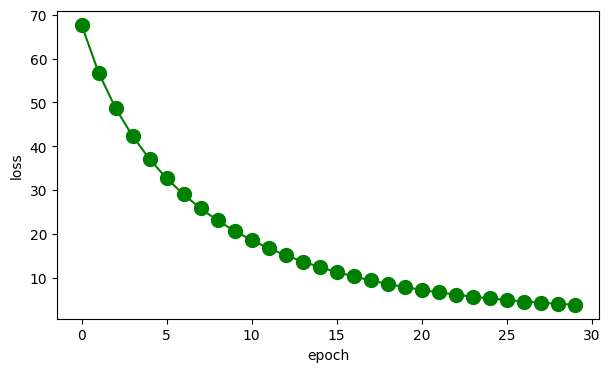

In [34]:
fig = plt.figure(figsize=(7, 4))
plt.plot(losses[:30], marker='o', markersize=10, color='green')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

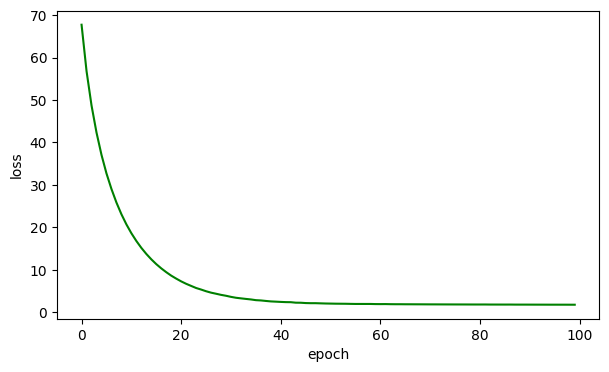

In [32]:
fig = plt.figure(figsize=(7, 4))
plt.plot(losses, color='green')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()